<a href="https://colab.research.google.com/github/Duddu64/PDI/blob/main/FiltragemEspacialManual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from re import X
import cv2
import numpy as np
from PIL import Image # pillow
import matplotlib.pyplot as plt
from scipy import ndimage

In [41]:
def Plota(img, i1,i2,i3,i4,i5,i6,i7):
  fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(20, 5))
  ax[0].imshow(img, cmap='gray')
  ax[0].set_title("Imagem original")
  ax[1].imshow(i1, cmap='gray')
  ax[1].set_title("Média")
  ax[2].imshow(i2, cmap='gray')
  ax[2].set_title("Laplaciano")
  ax[3].imshow(i3, cmap='gray')
  ax[3].set_title("Gaussiano")
  ax[4].imshow(i4, cmap='gray')
  ax[4].set_title("Sobel X")
  ax[5].imshow(i5, cmap='gray')
  ax[5].set_title("Sobel Y")
  ax[6].imshow(i6, cmap='gray')
  ax[6].set_title("Gradiente")
  ax[7].imshow(i7, cmap='gray')
  ax[7].set_title("Laplaciano + Original IMG")
  plt.show()

In [ ]:
def mascara(cont):
  switch = {
      0: np.array(([0.1111, 0.1111, 0.1111],
                  [0.1111, 0.1111, 0.1111],
                  [0.1111, 0.1111, 0.1111]), dtype="float"),
      1: np.array(([0.0625, 0.125, 0.0625],
                  [0.1250, 0.250, 0.1250],
                  [0.0625, 0.125, 0.0625]), dtype="float"),
      2: np.array(([0,  1, 0],
                  [1, -4, 1],
                  [0,  1, 0]), dtype="int"),
      3: np.array(([-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]), dtype="int"),
      4: np.array(([-1, -2, -1],
                  [ 0,  0,  0],
                  [ 1,  2,  1]), dtype="int")
  }
  return switch.get(cont, "Invalid mask")

In [37]:
def convolucao(img):
  npImg = np.array(img).astype('int')
  npImg = np.pad(npImg, pad_width = 1, mode = 'constant', constant_values = 0)
  npImg2 = npImg.copy()
  imgs={}
  for z in range(0,5):
    mask=mascara(z)
    for i in range(1, npImg.shape[0]-1):
      for j in range(1, npImg.shape[1]-1):
        vizinhos = [[npImg[i-1,j-1], npImg[i-1,j], npImg[i-1,j+1]],
                    [npImg[i,j-1],   npImg[i,j],   npImg[i,j+1]],
                    [npImg[i+1,j-1], npImg[i+1,j], npImg[i+1,j+1]]]
        vizinhos =  mask*vizinhos

        npImg2[i,j] = np.sum(vizinhos)
    npImg2 = np.where(npImg2<0, 0, npImg2)
    imgs[z] = npImg2
  imgs[5]=imgs[4]+imgs[3]
  imgs[6]=npImg+imgs[2]
  Plota(img, imgs[0],imgs[1],imgs[2],imgs[3],imgs[4],imgs[5],imgs[6])


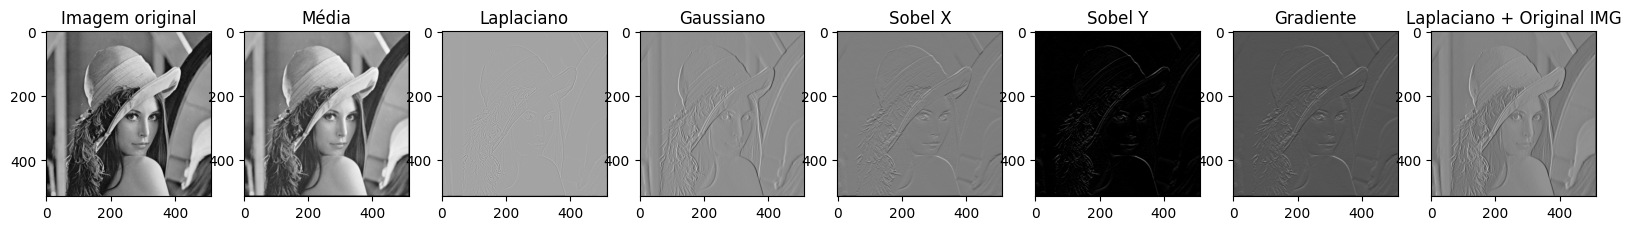

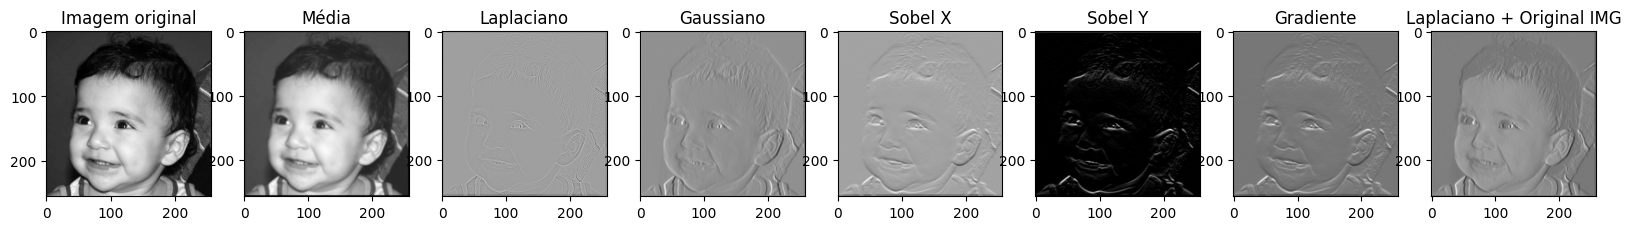

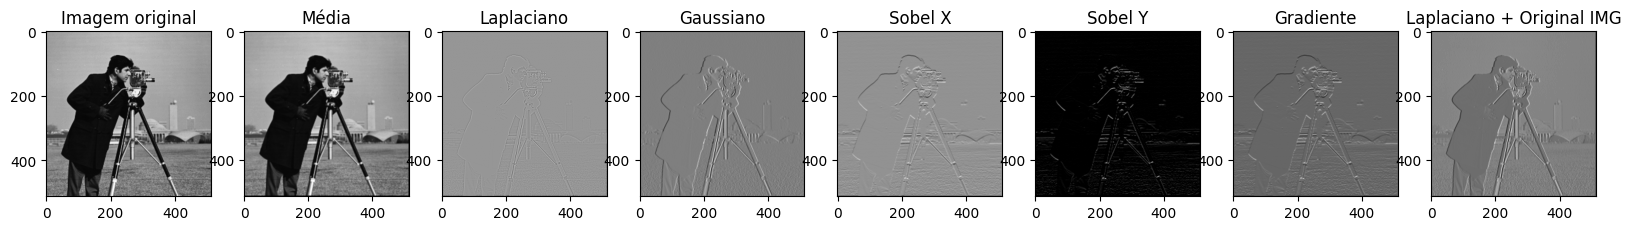

In [42]:
def main():
  im={
      0: Image.open('/content/lena_gray_512.tif').convert('L'),
      1: Image.open('/content/biel.png'),
      2: Image.open('/content/cameraman.tif').convert('L')
  }
  for i in range(0,3):
      convolucao(im[i])

if __name__ == "__main__":
  main()

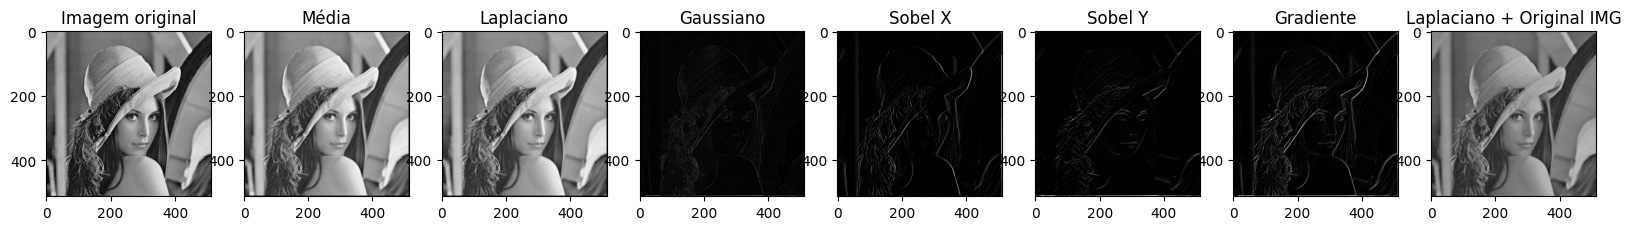

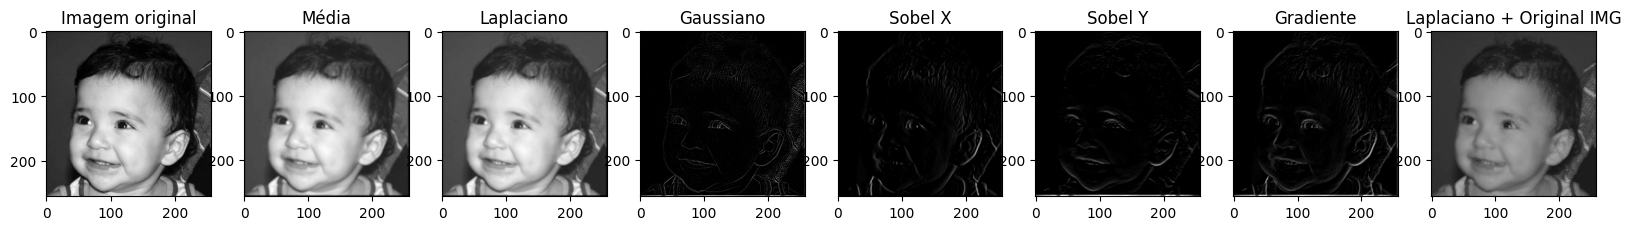

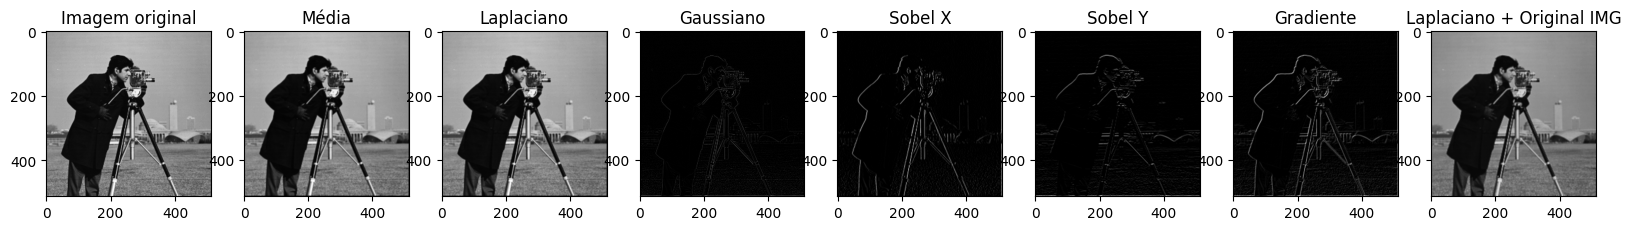

In [50]:
def convolucao2(img):
  npImg = np.array(img).astype('int')
  npImg = np.pad(npImg, pad_width = 1, mode = 'constant', constant_values = 0)
  imgs={}
  for z in range(0,5):
    mask=mascara(z)
    im1 = ndimage.convolve(npImg, mask, mode='reflect')
    im1 = np.where(im1<0, 0, im1)
    image_out = Image.fromarray(im1.astype('uint8'))
    imgs[z] = im1
  imgs[5]=imgs[4]+imgs[3]
  imgs[6]=npImg+imgs[2]
  Plota(img, imgs[0],imgs[1],imgs[2],imgs[3],imgs[4],imgs[5],imgs[6])


def main():
  im={
      0: Image.open('/content/lena_gray_512.tif').convert('L'),
      1: Image.open('/content/biel.png'),
      2: Image.open('/content/cameraman.tif').convert('L')
  }
  for i in range(0,3):
      convolucao2(im[i])

if __name__ == "__main__":
  main()

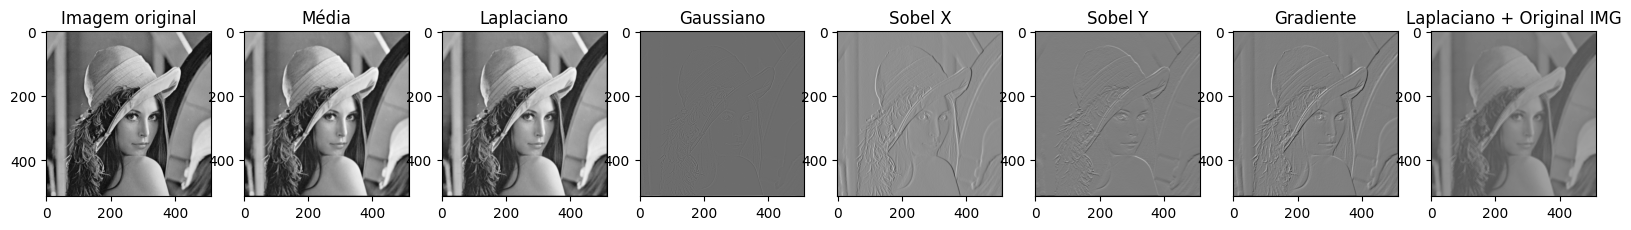

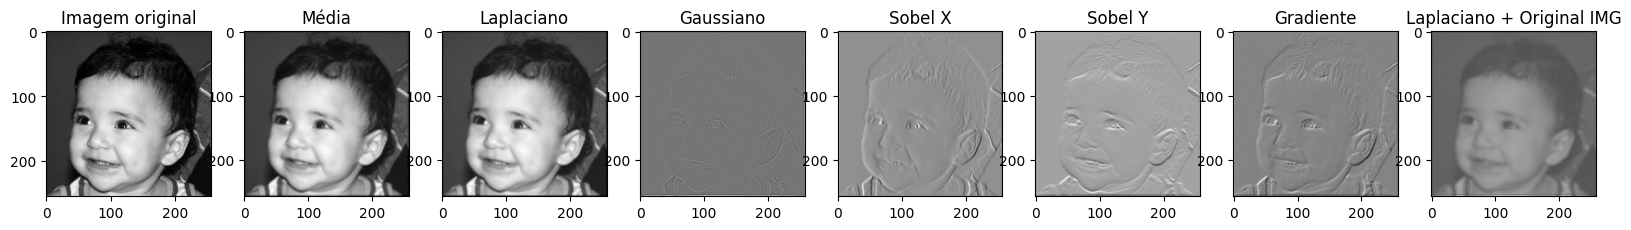

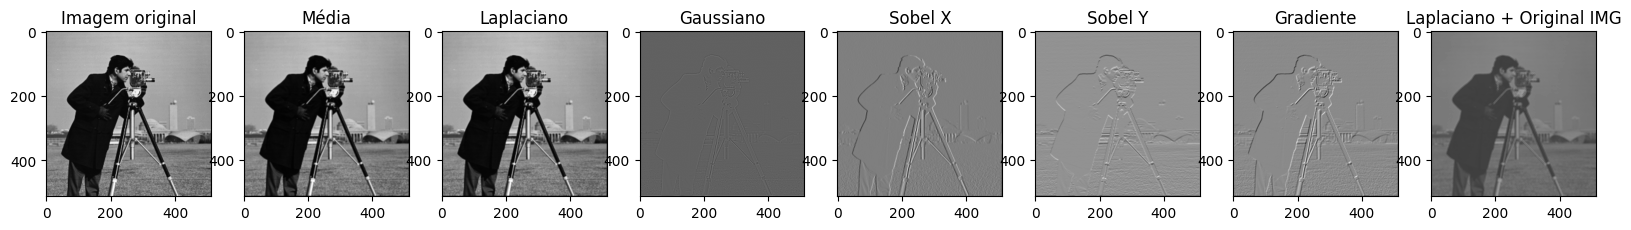

In [54]:
def convolucao3(img):
  npImg = np.array(img).astype('float32')
  npImg = np.pad(npImg, pad_width = 1, mode = 'constant', constant_values = 0)
  imgs={}
  for z in range(0,5):
    kernel1 = mascara(z)
    identity = cv2.filter2D(src=npImg, ddepth=-1, kernel=kernel1)
    imgs[z] = identity
  imgs[5]=imgs[4]+imgs[3]
  imgs[6]=npImg+imgs[2]
  Plota(img, imgs[0],imgs[1],imgs[2],imgs[3],imgs[4],imgs[5],imgs[6])


def main():
  im={
      0: Image.open('/content/lena_gray_512.tif').convert('L'),
      1: Image.open('/content/biel.png'),
      2: Image.open('/content/cameraman.tif').convert('L')
  }
  for i in range(0,3):
      convolucao3(im[i])

if __name__ == "__main__":
  main()